# GRADCAM

Let's start with a pretrained VGG model

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2
from keras import backend as K
from google.colab.patches import cv2_imshow

In [2]:
model = VGG16(weights="imagenet")
model.summary()





553467904/553467096 [==============================] - 35s 0us/step


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

1.  Loading helper functions
2.  Load VGG
3. Load Image
4. Rescale image to 224x224x3 (VGG's expectation, why?)
5. Use expand_dims to convert image to a batch of size 1
6. Preprocesing normalizes our input image by subtracting mean RGB values

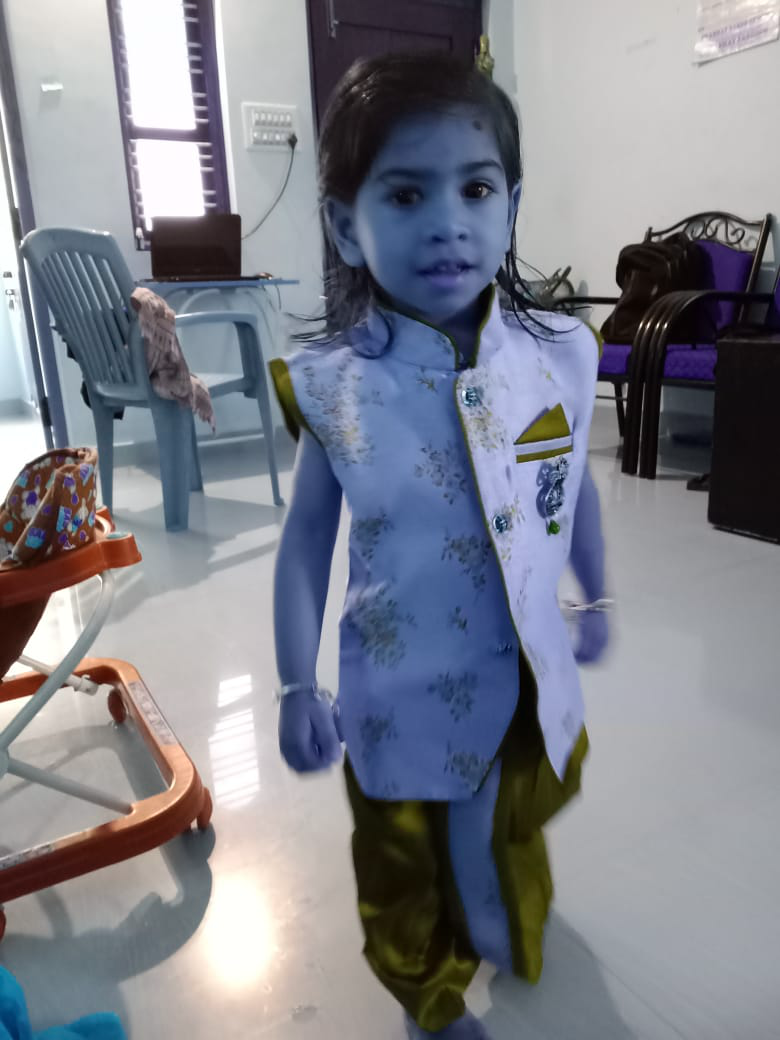

In [38]:
from skimage import io
from google.colab.patches import cv2_imshow
parth = io.imread("/content/image.jpeg")
cv2_imshow( parth)

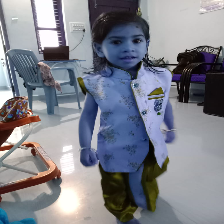

In [39]:
parth = cv2.resize(parth, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
cv2_imshow( parth)

In [40]:
x = image.img_to_array(parth)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

1. We get the predictions for the image
2. We take the topmost class index
3. Take output from the final convolutional layer

In [41]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)  ##  842: 'swimming trunks, bathing trunks'
class_output = model.output[:, class_idx]


842


1. Compute the gradient of the class output value with respect to the feature map
2. Pool the gradients over all the axies leaving out the channel dimension
3. Weigh the output feature map with the computed gradient values

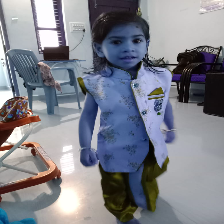

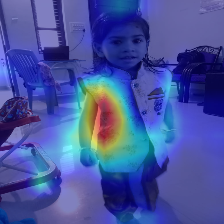

In [55]:
### Given Layer
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)

1. Average the weighted feature map along the channel dimension resulting in a heat map of size 14x14 
2. Normalize the heat map to make the values between 0 and 1

Show the results

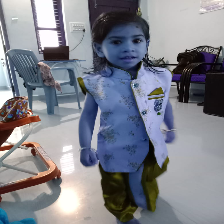

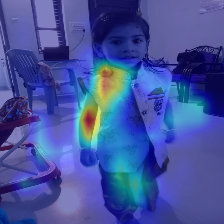

In [56]:
### One layer before last conv  Layer
last_conv_layer = model.get_layer("block5_conv2")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)

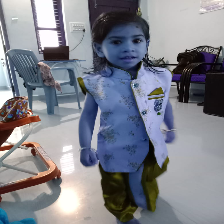

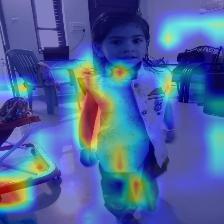

In [57]:
### Two layer before last conv  Layer
last_conv_layer = model.get_layer("block5_conv1")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)

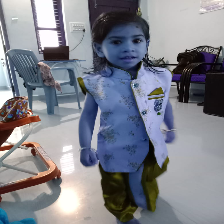

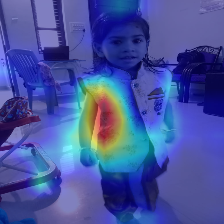

In [50]:
gradcam("block3_conv2")

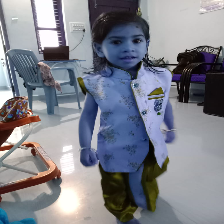

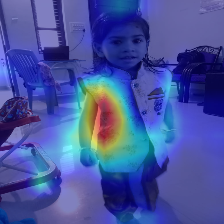

In [51]:
gradcam("block1_conv1")

## Finding SunGlass in Image

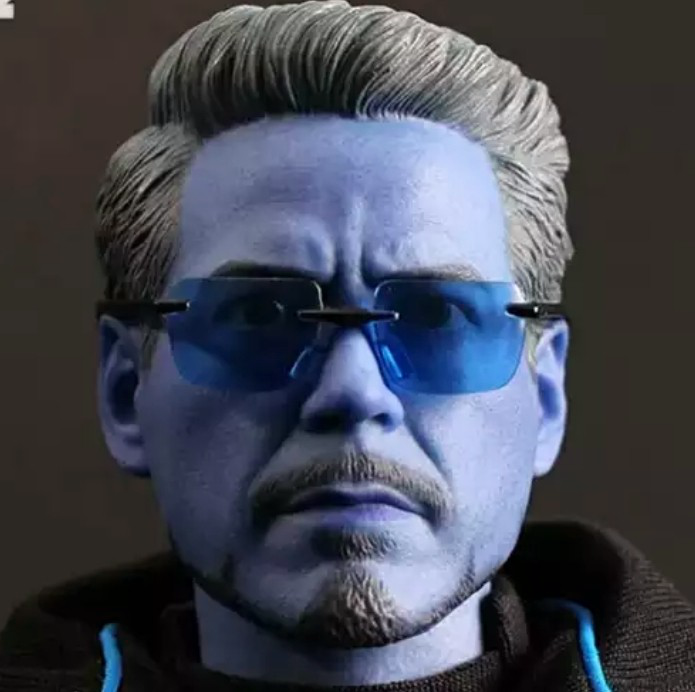

In [59]:
parth = io.imread("tony.jpg")
cv2_imshow( parth)

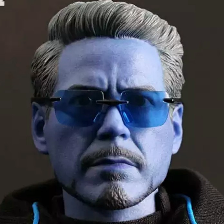

In [60]:
parth = cv2.resize(parth, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
cv2_imshow( parth)

In [61]:
x = image.img_to_array(parth)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [62]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)  ##  837: 'sunglasses, dark glasses, shades'
class_output = model.output[:, class_idx]


837


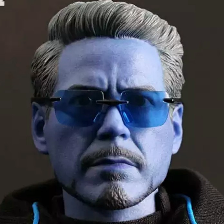

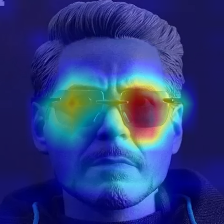

In [63]:
### ### Find Sunglass using class id - 837 (predicted class)
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)

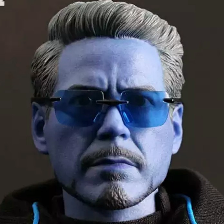

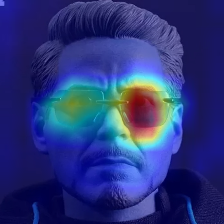

In [66]:
### Find Sunglass using class id - 836 (836: 'sunglass')
class_output = model.output[:, 836]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)

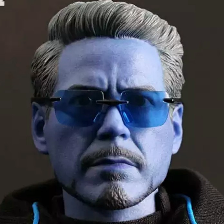

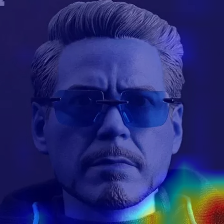

In [67]:
### Find sweatshirt using class id - 841 (841: 'sweatshirt')
class_output = model.output[:, 841]
last_conv_layer = model.get_layer("block5_conv3")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (parth.shape[1], parth.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(parth, 0.5, heatmap, 0.5, 0)
cv2_imshow( parth)
cv2_imshow(superimposed_img)